In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sklearn 

In [2]:
starter_df = pd.read_csv('data/stroke_data.csv')

In [3]:
starter_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
starter_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
starter_df.info()
#bmi has 201 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
starter_df['stroke'].value_counts()
# Highly imbalance dataset!

stroke
0    4861
1     249
Name: count, dtype: int64

In [7]:
#correct datatype
starter_df['age'] = starter_df['age'].astype(int)
# Standardize columns to lowercase. 
starter_df.columns = starter_df.columns.str.lower()
#drop id column
starter_df = starter_df.drop(columns=['id'])

starter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [8]:
starter_ohe = pd.get_dummies(starter_df, columns=['gender','hypertension','heart_disease','ever_married','work_type','residence_type','smoking_status'], drop_first=False)
starter_ohe

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,228.69,36.6,1,False,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61,202.21,NaN,1,True,False,False,True,False,True,...,False,False,True,False,True,False,False,False,True,False
2,80,105.92,32.5,1,False,True,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49,171.23,34.4,1,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79,174.12,24.0,1,True,False,False,False,True,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80,83.75,NaN,0,True,False,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
5106,81,125.20,40.0,0,True,False,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
5107,35,82.99,30.6,0,True,False,False,True,False,True,...,False,False,True,False,True,False,False,False,True,False
5108,51,166.29,25.6,0,False,True,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False


In [9]:
starter_ohe = starter_ohe.drop(columns=['gender_Other'])
starter_ohe

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,228.69,36.6,1,False,True,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
1,61,202.21,NaN,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
2,80,105.92,32.5,1,False,True,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49,171.23,34.4,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
4,79,174.12,24.0,1,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80,83.75,NaN,0,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
5106,81,125.20,40.0,0,True,False,True,False,True,False,...,False,False,True,False,False,True,False,False,True,False
5107,35,82.99,30.6,0,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
5108,51,166.29,25.6,0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [10]:
#separate target from features
X = starter_ohe.drop(columns=['stroke'])  # All columns except the target
y = starter_ohe['stroke']  #target column

#split test/train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [11]:
##concat test vs train datasets + reset indexes
testdf = pd.concat([X_test, y_test],axis=1)
testdf = testdf.reset_index(drop=True) 
traindf = pd.concat([X_train, y_train], axis=1)
traindf = traindf.reset_index(drop=True) 

In [12]:
#WORKING WITH TRAINING DATA
traindf.info()
#bmi missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4088 non-null   int64  
 1   avg_glucose_level               4088 non-null   float64
 2   bmi                             3918 non-null   float64
 3   gender_Female                   4088 non-null   bool   
 4   gender_Male                     4088 non-null   bool   
 5   hypertension_0                  4088 non-null   bool   
 6   hypertension_1                  4088 non-null   bool   
 7   heart_disease_0                 4088 non-null   bool   
 8   heart_disease_1                 4088 non-null   bool   
 9   ever_married_No                 4088 non-null   bool   
 10  ever_married_Yes                4088 non-null   bool   
 11  work_type_Govt_job              4088 non-null   bool   
 12  work_type_Never_worked          40

In [12]:
#identify & handle missing values
traindf.isna().sum()

age                                 0
avg_glucose_level                   0
bmi                               170
gender_Female                       0
gender_Male                         0
hypertension_0                      0
hypertension_1                      0
heart_disease_0                     0
heart_disease_1                     0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
residence_type_Rural                0
residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
stroke                              0
dtype: int64

In [13]:
#feature engineering columns to assess for best imputation
bmi_mean = traindf['bmi'].mean()
traindf['bmi_imputed_mean'] = traindf['bmi'].fillna(bmi_mean)
bmi_med = traindf['bmi'].median()
traindf['bmi_imputed_med'] = traindf['bmi'].fillna(bmi_med) 
#taking average of 3 modes
bmi_mode = np.mean(traindf['bmi'].mode())      
traindf['bmi_imputed_mode'] = traindf['bmi'].fillna(bmi_mode)


In [14]:
from miceforest import ImputationKernel
mice_kernel = ImputationKernel(
data = traindf,
random_state = 2023
)
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,bmi_imputed_mean,bmi_imputed_med,bmi_imputed_mode
0,48,69.21,33.1,True,False,True,False,True,False,False,...,False,True,False,False,True,False,0,33.1,33.1,33.1
1,15,122.25,21.0,False,True,True,False,True,False,True,...,True,False,False,False,True,False,0,21.0,21.0,21.0
2,67,110.42,24.9,True,False,True,False,True,False,False,...,True,False,False,False,True,False,0,24.9,24.9,24.9
3,44,65.41,24.8,False,True,True,False,True,False,False,...,False,True,False,False,False,True,0,24.8,24.8,24.8
4,14,82.34,31.6,False,True,True,False,True,False,True,...,False,True,True,False,False,False,0,31.6,31.6,31.6


In [15]:
bmi_mice = mice_imputation['bmi']
traindf['bmi_mice_imputation'] = traindf['bmi'].fillna(bmi_mice)

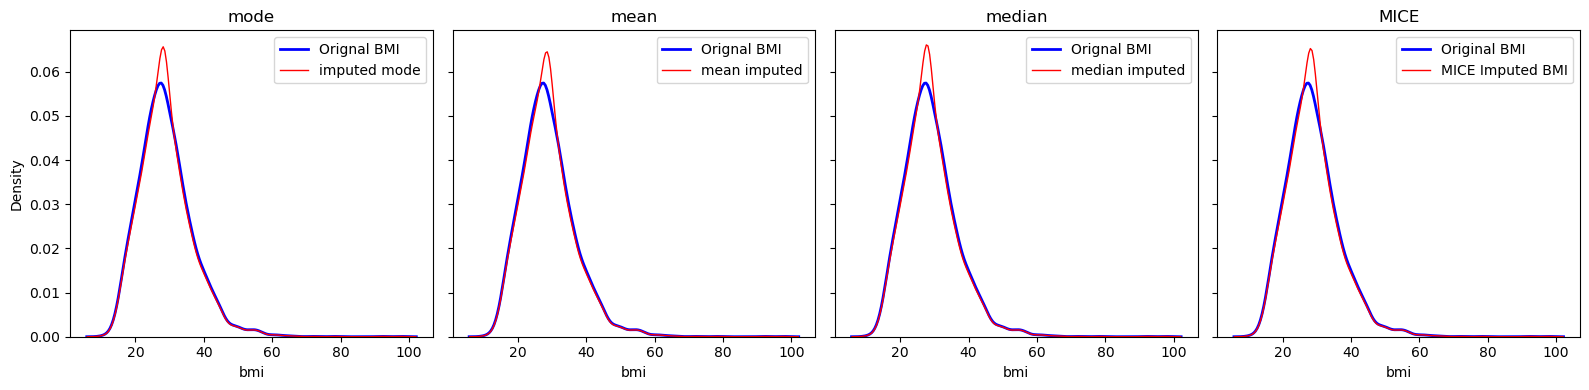

In [16]:
# Set up a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

#plot for mice
sns.kdeplot(
    data=traindf['bmi'], 
    label='Original BMI', 
    color='blue', 
    linewidth=2, 
    ax=axes[3]
)
sns.kdeplot(
    data=traindf['bmi_mice_imputation'], 
    label='MICE Imputed BMI', 
    color='red', 
    linewidth=1, 
    ax=axes[3]
)
axes[3].set_title('MICE')
axes[3].legend()

# Plot for mean
sns.kdeplot(data=traindf['bmi'],
            label='Orignal BMI',
           color='blue',
           linewidth=2,
           ax=axes[1])
sns.kdeplot(data=traindf['bmi_imputed_mean'],
            label='mean imputed',
           color='red',
           linewidth=1,
           ax=axes[1])
axes[1].set_title('mean')
axes[1].legend()

#Plot for median
sns.kdeplot(data=traindf['bmi'],
            label='Orignal BMI',
           color='blue',
           linewidth=2,
           ax=axes[2])
sns.kdeplot(data=traindf['bmi_imputed_med'],
            label='median imputed',
           color='red',
           linewidth=1,
           ax=axes[2])
axes[2].set_title('median')
axes[2].legend()

#Plot for mode 
sns.kdeplot(data=traindf['bmi'],
            label='Orignal BMI',
           color='blue',
           linewidth=2,
           ax=axes[0])
sns.kdeplot(data=traindf['bmi_imputed_mode'],
            label='imputed mode',
           color='red',
           linewidth=1,
           ax=axes[0])
axes[0].set_title('mode')
axes[0].legend()

# Adjust layout
plt.tight_layout()
plt.show()

#MICE IS BEST! 

In [17]:
traindf.isna().sum()
# Drop redundant columns
traindf = traindf.drop(columns=['bmi_imputed_mean','bmi_imputed_mode','bmi_imputed_med','bmi'])
traindf.rename(columns={'bmi_mice_imputation': 'bmi_final'}, inplace=True)

In [18]:
testdf.isna().sum()

age                                0
avg_glucose_level                  0
bmi                               31
gender_Female                      0
gender_Male                        0
hypertension_0                     0
hypertension_1                     0
heart_disease_0                    0
heart_disease_1                    0
ever_married_No                    0
ever_married_Yes                   0
work_type_Govt_job                 0
work_type_Never_worked             0
work_type_Private                  0
work_type_Self-employed            0
work_type_children                 0
residence_type_Rural               0
residence_type_Urban               0
smoking_status_Unknown             0
smoking_status_formerly smoked     0
smoking_status_never smoked        0
smoking_status_smokes              0
stroke                             0
dtype: int64

In [19]:
#apply same imputation to test data
bmi_mice = mice_imputation['bmi']
testdf['bmi_mice_imputation'] = testdf['bmi'].fillna(bmi_mice)
testdf = testdf.drop(columns=['bmi'])
testdf.rename(columns={'bmi_mice_imputation': 'bmi_final'}, inplace=True)

In [ ]:
# Final train and test dataframes prepared

In [ ]:
#Including some of my basic EDA here. 

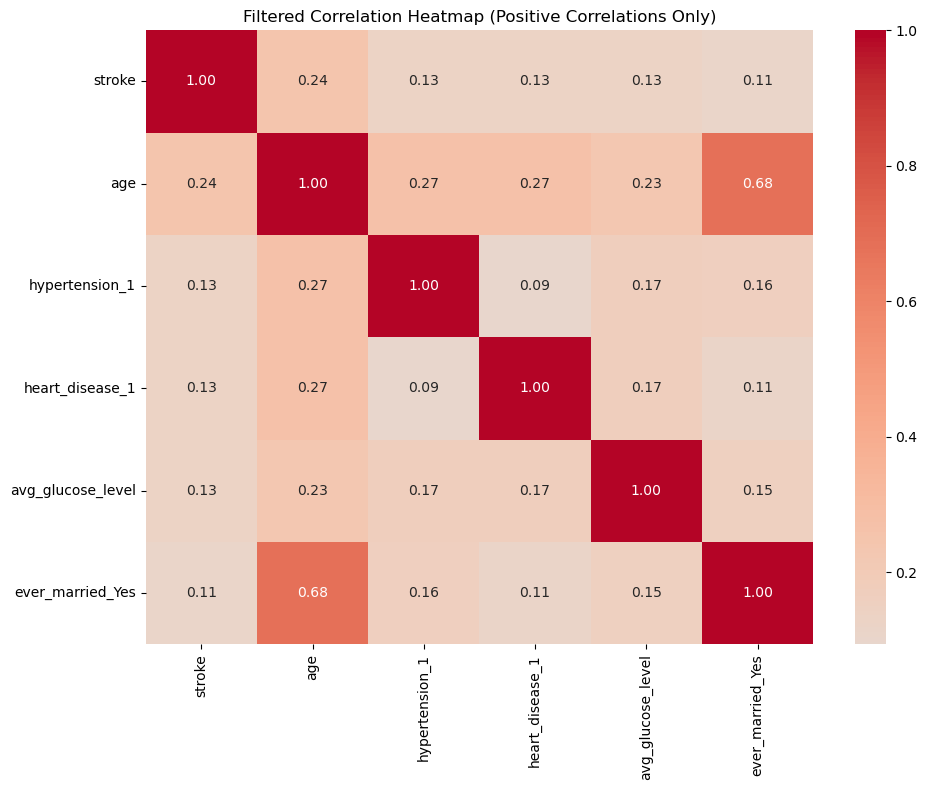

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlations = traindf.corr()

# Filter and sort correlations descending based on the 'stroke' column
correlations_sorted = correlations['stroke'].sort_values(ascending=False)
positive_corr_columns = correlations_sorted[correlations_sorted > 0.1].index  # Only positive values above 0.1

# subset of the correlation matrix for the selected columns
filtered_corr_matrix = correlations[positive_corr_columns].loc[positive_corr_columns]

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix,
            annot=True,  # Show correlation coefficients
            cmap='coolwarm',
            center=0,
            fmt='.2f')

# Title and layout
plt.title('Filtered Correlation Heatmap (Positive Correlations Only)')
plt.tight_layout()
plt.show()

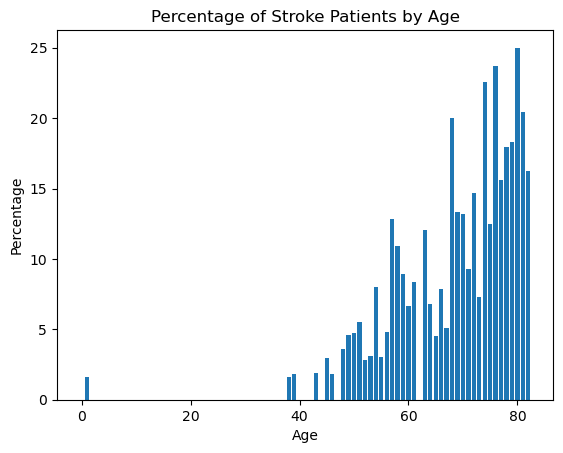

In [31]:
#Percent of patients of different ages with stroke history

strokes_by_age = traindf.groupby('age')['stroke'].sum()
total_by_age = traindf.groupby('age').size()

percent_per_age = strokes_by_age/total_by_age*100
round(percent_per_age, 2)

plt.bar(percent_per_age.index , percent_per_age.values)
plt.title('Percentage of Stroke Patients by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

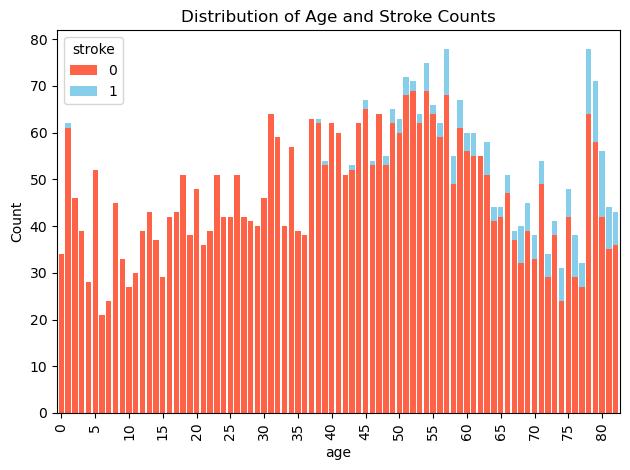

In [ ]:
import matplotlib.pyplot as plt
#visualize this in a diff way (for fun!)
plt.figure()

age_counts = traindf['age'].value_counts()
age_target_counts = traindf.groupby(['age', 'stroke']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
age_target_counts.plot(kind='bar', stacked=True, color=['#FF6347','#87CEEB'], width=0.8)

# Labels and title
plt.ylabel('Count')
plt.title('Distribution of Age and Stroke Counts')
plt.xticks(ticks=range(0, len(age_target_counts), 5), 
           labels=age_target_counts.index[::5])
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Exploring classification algorithms

In [ ]:
traindf.info()

In [73]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1022 non-null   int64  
 1   avg_glucose_level               1022 non-null   float64
 2   gender_Female                   1022 non-null   bool   
 3   gender_Male                     1022 non-null   bool   
 4   gender_Other                    1022 non-null   bool   
 5   hypertension_0                  1022 non-null   bool   
 6   hypertension_1                  1022 non-null   bool   
 7   heart_disease_0                 1022 non-null   bool   
 8   heart_disease_1                 1022 non-null   bool   
 9   ever_married_No                 1022 non-null   bool   
 10  ever_married_Yes                1022 non-null   bool   
 11  work_type_Govt_job              1022 non-null   bool   
 12  work_type_Never_worked          10

In [21]:
X = traindf.drop(columns=['stroke'])  # All columns except the target
y = traindf['stroke']  #target column

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

type(X_train)
type(y_train)

pandas.core.series.Series

In [23]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
#Instantiate the model
logreg_model = LogisticRegression(solver='liblinear')
#Fit the model
logreg_model.fit(X, y)
#Prediction
logreg_model_pred = logreg_model.predict(X)

In [ ]:
# Generate and print the classification report
from sklearn.metrics import classification_report
print(classification_report(y, logreg_model_pred))

#f1-score 0?!

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3889
           1       0.00      0.00      0.00       199

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
#Instantiate the model
dt_model = DecisionTreeClassifier(max_depth=5)
#Fit the model
dt_model.fit(X, y)
#Prediction
dt_model_pred = dt_model.predict(X)

In [25]:
print(classification_report(y, dt_model_pred))
#f1-score 0.08

NameError: name 'classification_report' is not defined

In [81]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 30)
    min_samples_split=trial.suggest_int('min_samples_split',2,30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 30)
    max_leaf_nodes=trial.suggest_int('max_leaf_nodes', 2, 30)

    class_weight_options = [
        None,
        'balanced',
        {0: 1, 1: 10},
        {0: 1, 1: 15},
        {0: 0.5, 1: 20},
        {0: 0.4, 1: 30},
        {0: 1, 1: 7},
        {0: 1, 1: 6},
        {0: 1, 1: 3},
    ]
    class_weight = trial.suggest_categorical('class_weight', class_weight_options)

    clf = DecisionTreeClassifier(
        random_state=42,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        max_leaf_nodes=max_leaf_nodes,
        
        class_weight=class_weight
    )

    cv = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)  # Increase n_trials as needed

print("Best hyperparameters:", study.best_params)
print("Best score:", study.best_value)

[I 2024-12-09 20:39:58,210] A new study created in memory with name: no-name-7a8eade7-893c-4c60-b71e-3b281610a6b5
/opt/anaconda3/lib/python3.12/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 10} which is of type dict.
  warnings.warn(message)
/opt/anaconda3/lib/python3.12/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 15} which is of type dict.
  warnings.warn(message)
/opt/anaconda3/lib/python3.12/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 0.5, 1: 20} which is of type dict.
  warnings.warn(message)
/opt/anaconda3/lib/python3.12/site-packages/optuna/distribu

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 30, 'min_samples_leaf': 3, 'max_leaf_nodes': 19, 'class_weight': {0: 1, 1: 7}}
Best score: 0.2922462537462537


In [99]:
from sklearn.tree import DecisionTreeClassifier

class_weights = {0: 1, 1: 10} 

clf = DecisionTreeClassifier(class_weight=class_weights,random_state=42, criterion="entropy",
                             min_samples_split=2, min_samples_leaf=27, max_depth=23, max_leaf_nodes=6)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

In [100]:
class_names = [str(x) for x in clf.classes_]

In [101]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_dt)

array([[727, 245],
       [ 11,  39]])

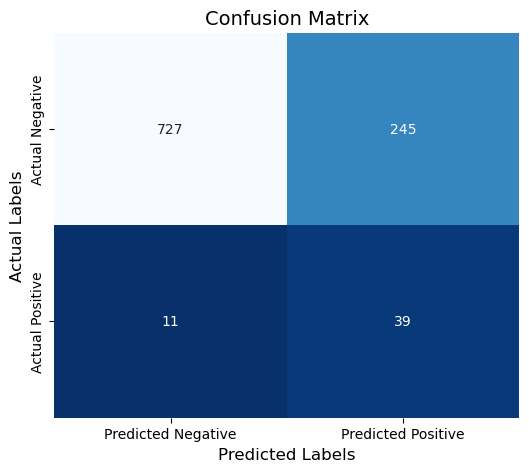

In [102]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dt)

# Heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'], cbar=False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)

# Show the plot
plt.show()

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.78      0.23        50

    accuracy                           0.75      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [104]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))

Accuracy = 0.75
Kappa = 0.16
F1 Score = 0.23
Log Loss = 9.03


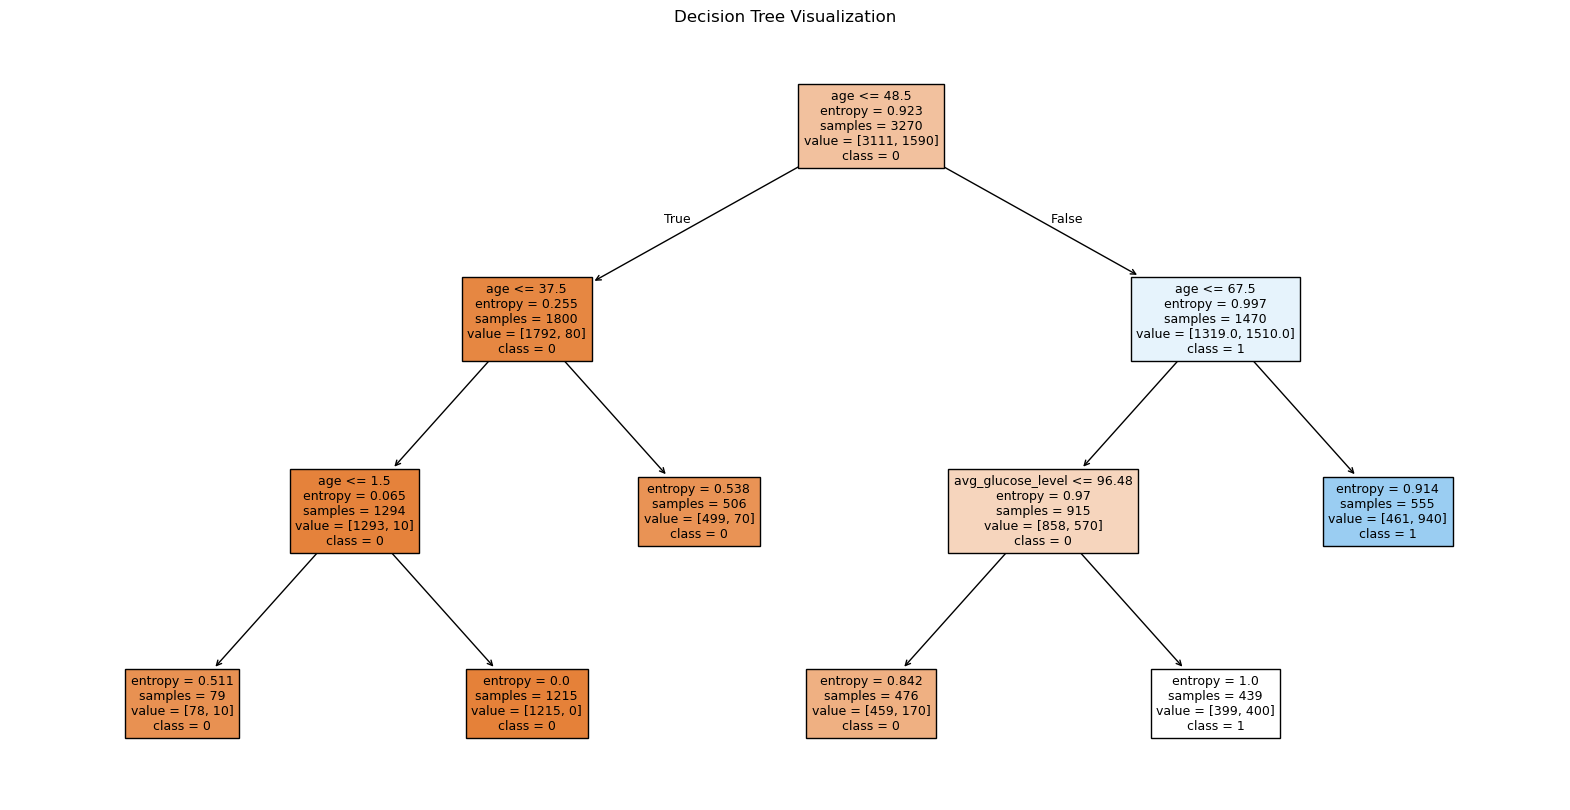

In [88]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,                              # The trained decision tree classifier
    feature_names=X_train.columns,   # Feature names (columns of your dataset)
    class_names=clf.classes_.astype(str),  # Class names (if target variable is encoded)
    filled=True,                     # Fill nodes with colors based on class
    rounded=False,                    # Round the corners of nodes
    fontsize=9                    # Font size for readability
)
plt.title("Decision Tree Visualization", fontsize=12)
plt.show()

In [33]:
# Making predictions on the test dataset

In [105]:
X_test = testdf.drop(columns=['stroke']) 

In [106]:
y_test=testdf['stroke']

In [107]:
y_pred_dt = clf.predict(X_test)


In [108]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.78      0.23        50

    accuracy                           0.75      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [109]:
f1 = f1_score(y_test, y_pred_dt)

print("F1 Score:", f1)

F1 Score: 0.23353293413173654
